# Import libraries

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preparation

In [224]:
df= pd.read_csv('D:\Data/1/car_data.csv')

In [225]:
df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [226]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [227]:
df.shape

(11914, 16)

In [228]:
# Edit the colomn names to be all lower and and has '_' instead of paces
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [229]:
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [230]:
# get the categorical features colomn names
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

# Exploratory Data Analysis

In [231]:
# Number of unique names in each colomn
for col in df.columns:
    #print(col)
    #print(df[col].unique()[:5])
    print( col ,'\t\t',df[col].nunique())
    #print()

make 		 48
model 		 915
year 		 28
engine_fuel_type 		 10
engine_hp 		 356
engine_cylinders 		 9
transmission_type 		 5
driven_wheels 		 4
number_of_doors 		 3
market_category 		 71
vehicle_size 		 3
vehicle_style 		 16
highway_mpg 		 59
city_mpg 		 69
popularity 		 48
msrp 		 6049


<AxesSubplot:xlabel='msrp', ylabel='Count'>

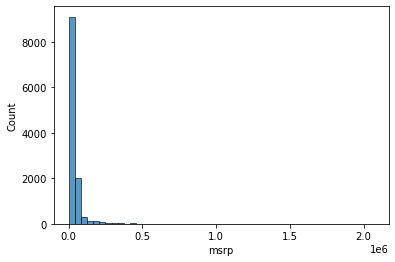

In [232]:
sns.histplot(df.msrp, bins=50)
#the features are skewed
# we need to normalize it

<AxesSubplot:ylabel='Count'>

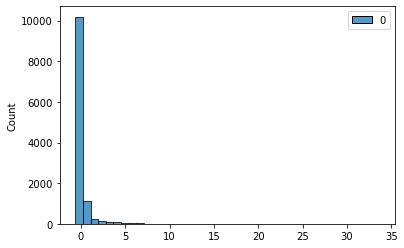

In [233]:
#Scaling ? for the price ?
#When a feature does not follow a linear distribution, it would be unwise to use the mean and the standard deviation
#to scale it. For example, here is what would have happened if we scaled the skewed distributions of price
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x = df['msrp'].values.reshape(-1, 1)
x = scaler.fit_transform(x)
sns.histplot(x, bins=40)

#The fact that the features are still skewed confirms that standardization does not work on them.

<AxesSubplot:ylabel='Count'>

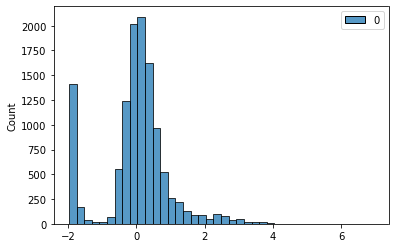

In [234]:
#Log Transformation with PowerTransformer

#To implement non-linear transformations, Sklearn offers a PowerTransformer class (uses logarithmic functions
#under the hood) that helps minimize skewness and map any distribution to a normal one as close as possible:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
x = df['msrp'].values.reshape(-1, 1)
x = pt.fit_transform(x)
sns.histplot(x, bins=40)
# that's better and looks like normally distributed

<AxesSubplot:xlabel='msrp', ylabel='Count'>

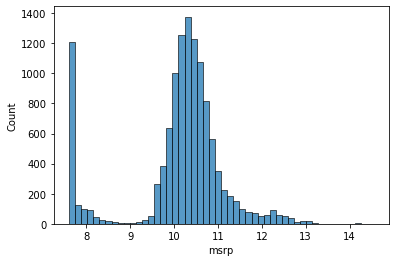

In [235]:
### ALSO ###
#for a better visualization we take the log to rescale the data
#Non-Linear transformation
price_logs = np.log(df.msrp)
sns.histplot(price_logs, bins=50)
# And looks like it's Normally distributed

<AxesSubplot:xlabel='msrp', ylabel='Count'>

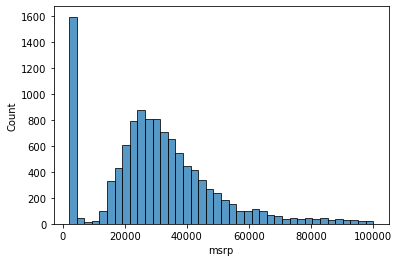

In [236]:
# just a good and quick replacement

#distribution of the price
sns.histplot(df.msrp[df.msrp < 100000], bins=40)

# Feature Engineering

In [237]:
# Is there is any missing values?
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [238]:
df.head(1)
# filling the null values ,, all of them with mode ( most frequent value )
# engine fuel type
# engine_hp 
# engine cylinder
# number of doors 
# market category 

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [239]:
df['engine_fuel_type'].fillna(df['engine_fuel_type'].mode()[0], inplace=True)
df['engine_hp'].fillna(df['engine_hp'].mode()[0], inplace=True)
df['engine_cylinders'].fillna(df['engine_cylinders'].mode()[0], inplace=True)
df['number_of_doors'].fillna(df['number_of_doors'].mode()[0], inplace=True)
df['market_category'].fillna(df['market_category'].mode()[0], inplace=True)

In [240]:
df.isnull().sum()
# No null values remain

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [241]:
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [243]:
#define numeric features and o/p
x = df[['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']]
y = df['msrp']

In [244]:
# Scaling of Data

In [245]:
# scaling numerical i/p data
# leave the categorical

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
df[['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']] = scaler.fit_transform(df[['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']])

In [246]:
# scaling the o/p (y) ( the price )

##Log Transformation with PowerTransformer for the price (the output)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
df['msrp'] = pt.fit_transform(df['msrp'].values.reshape(-1, 1))

In [247]:
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),0.788542,0.210814,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,-0.07193,-0.081587,1.637604,0.522155


In [280]:
#Convert the categorical variables to dummy SO we can fit to the linear regression model

df_dummies = pd.get_dummies(df, columns=['make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style', 'transmission_type'])

In [281]:
df_dummies.head(1)

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp,make_Acura,make_Alfa Romeo,...,vehicle_style_Passenger Minivan,vehicle_style_Passenger Van,vehicle_style_Regular Cab Pickup,vehicle_style_Sedan,vehicle_style_Wagon,transmission_type_AUTOMATED_MANUAL,transmission_type_AUTOMATIC,transmission_type_DIRECT_DRIVE,transmission_type_MANUAL,transmission_type_UNKNOWN
0,2011,0.788542,0.210814,2.0,-0.07193,-0.081587,1.637604,0.522155,0,0,...,0,0,0,0,0,0,0,0,1,0


In [287]:
x = df_dummies.drop(columns='msrp')
y = df_dummies['msrp']

In [288]:
# Split train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
len(x_train)

9531

# Define and training the model

In [289]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [291]:
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

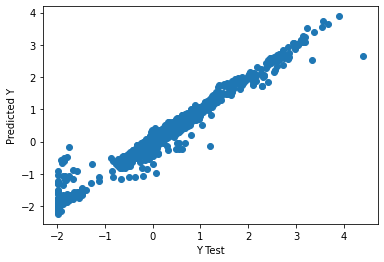

In [294]:
#Create a scatterplot of the real test values versus the predicted values
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [296]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.09147300584230057
MSE: 0.025027965619129414
RMSE: 0.15820229334345762


In [298]:
# Variance score
metrics.explained_variance_score(y_test, y_pred)

0.974058995364236

# we have a very good model with a low error and high variance score

# Residuals

We should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. 

<AxesSubplot:xlabel='msrp', ylabel='Density'>

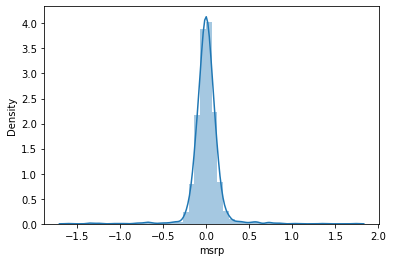

In [300]:
sns.distplot((y_test-y_pred),bins=50)

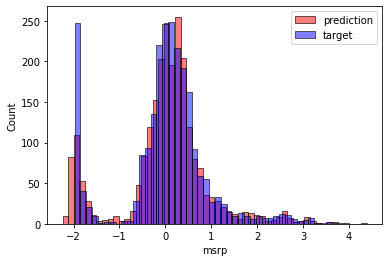

In [301]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_test, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()